In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/distan_lat42.22lon-8.63p2R1Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
import pandas as pd
station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/LEVX_20192020.csv",
                          usecols = ["time", "skyc1_o"],
                          parse_dates=["time"]).set_index("time")
#cloud cover
print("Cloud cover frequencies\n")                          
station["skyc1_o"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

Cloud cover frequencies



M      40%
FEW    17%
SCT    16%
BKN    14%
VV      9%
OVC     2%
NSC     2%
Name: skyc1_o, dtype: object

**Forecast D1**

In [5]:
#forecast d1
model1k = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEVX_1km/input_files/lat42.22lon-8.63p2R1KmD1.csv",parse_dates=["time"]).drop(columns=["Unnamed: 0"]).set_index("time")
model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,8.171858,...,0.000000,0.000000e+00,0.142531,0.000000,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 01:00:00,333.670044,0.0,1731.173340,1.369249,2.540694,103382.539062,280.565735,0.778615,24135.000000,8.045405,...,0.000000,0.000000e+00,0.112280,0.000000,0.0,0.112280,5732.622559,1611.490601,253.512878,281.793762
2019-01-02 02:00:00,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,7.194441,...,0.000000,-8.593750e-07,0.061034,0.000000,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,7.239085,...,0.000000,0.000000e+00,0.065096,0.000000,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,6.878137,...,0.000000,-2.343750e-09,0.085678,0.000000,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 19:00:00,297.835388,0.0,766.453003,6.263795,12.470805,101635.929688,279.777435,0.867834,24042.130859,28.299652,...,99.540001,-7.467773e+00,0.000000,0.000000,0.0,0.000000,5371.030273,1446.678223,240.972382,271.724701
2021-01-01 20:00:00,305.522644,0.0,769.984497,5.884632,12.509005,101664.109375,279.636444,0.861618,24046.214844,27.654913,...,37.480000,-6.560820e+00,0.000000,0.077832,0.0,0.077832,5373.912109,1448.029297,241.139252,271.784821
2021-01-01 21:00:00,304.144806,0.0,787.868713,6.053614,12.777985,101677.812500,279.624115,0.851240,24053.814453,30.302912,...,25.900000,-1.712590e+01,0.000000,0.097343,0.0,0.097343,5376.250977,1449.369507,241.217819,271.922638


In [6]:
#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k

,skyc1_o,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape1,cin1,cfh1,cfl1,cfm1,cft1,HGT5001,HGT8501,T5001,T8501
time,,,,,,,,,,,,,,,,,,,,,
2019-01-02 00:00:00,FEW,325.189301,0.0,1740.084961,1.217145,2.264327,103401.195312,280.789246,0.781950,24135.000000,...,0.0,0.000000e+00,0.142531,0.0,0.0,0.142531,5735.675293,1613.937378,253.634506,281.908569
2019-01-02 02:00:00,FEW,351.552429,0.0,1721.331055,1.275996,2.367275,103355.875000,280.324890,0.790180,24135.000000,...,0.0,-8.593750e-07,0.061034,0.0,0.0,0.061034,5730.169434,1609.190552,253.402405,281.787689
2019-01-02 03:00:00,NSC,33.307388,0.0,1717.657593,0.696653,1.317065,103329.765625,280.101318,0.786697,24135.000000,...,0.0,0.000000e+00,0.065096,0.0,0.0,0.065096,5728.023926,1606.675903,253.443604,281.926819
2019-01-02 04:00:00,NSC,164.234100,0.0,1696.665771,0.224833,0.409460,103310.062500,279.779572,0.795685,24135.000000,...,0.0,-2.343750e-09,0.085678,0.0,0.0,0.085678,5725.899414,1604.329346,253.527298,281.808014
2019-01-02 05:00:00,VV,172.277390,0.0,1675.816650,0.444178,0.813525,103278.773438,279.637054,0.811063,24135.000000,...,0.0,6.640625e-06,0.108834,0.0,0.0,0.108834,5723.016113,1601.333618,253.504395,281.562134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24 19:00:00,FEW,15.196351,0.0,1130.906982,4.987753,11.324133,102787.117188,280.919373,0.870596,24152.253906,...,0.0,6.250000e-05,0.000000,0.0,0.0,0.000000,5537.417480,1531.997803,247.842743,273.755432
2020-12-24 20:00:00,SCT,16.350925,0.0,1122.497314,5.154222,11.432768,102946.109375,280.681763,0.848550,24126.740234,...,0.0,-1.875000e-03,0.000000,0.0,0.0,0.000000,5535.646484,1534.440552,248.129868,273.678802
2020-12-24 21:00:00,M,14.447461,0.0,1130.548462,5.296582,11.482006,102860.429688,280.298004,0.850470,24164.386719,...,0.0,1.171875e-03,0.000000,0.0,0.0,0.000000,5539.025391,1538.744385,248.260315,273.823364


**Scatter plot significant meteorological variables and skyc1_o**

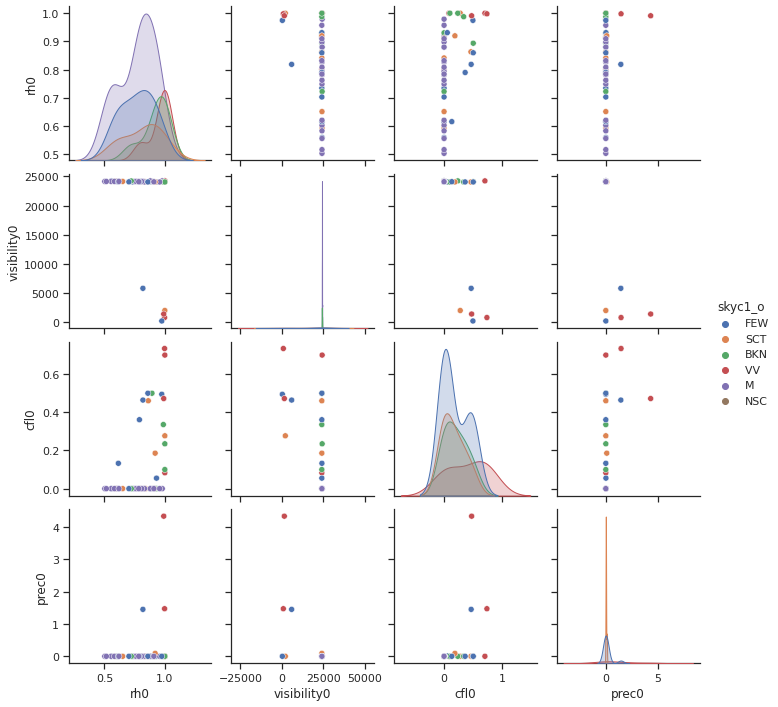

In [7]:
import seaborn as sns

sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["skyc1_o","rh0","visibility0","cfl0","prec0"]].sample(50), hue="skyc1_o");

**Scatter plot 3 PCA variables and skyc1_o**

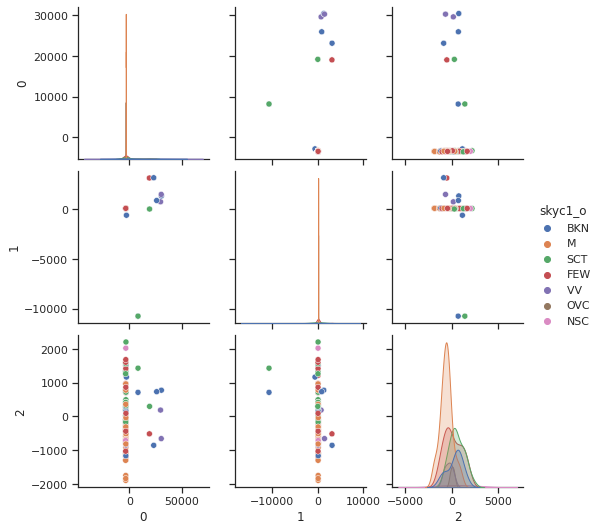

In [8]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:]),
                                                        index =df_all1k.index)
df_pca["skyc1_o"] = df_all1k.skyc1_o
sns.pairplot(df_pca.sample(100), hue="skyc1_o");

**Machine learning models. X variables**

In [9]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501'],
      dtype='object')

In [10]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k["skyc1_o"]
X = df_all1k.iloc[:,1:]


X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [03:52<00:00,  8.00s/it]


In [11]:
models

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LabelSpreading,0.59,0.46,None,0.59,17.26
LabelPropagation,0.59,0.46,None,0.59,11.82
ExtraTreesClassifier,0.63,0.45,None,0.62,3.20
RandomForestClassifier,0.62,0.41,None,0.60,8.77
LGBMClassifier,0.61,0.40,None,0.59,6.92
BaggingClassifier,0.59,0.37,None,0.57,5.84
ExtraTreeClassifier,0.52,0.36,None,0.51,0.12
KNeighborsClassifier,0.57,0.35,None,0.55,1.32
DecisionTreeClassifier,0.51,0.34,None,0.51,1.00


**LGBMClassifier. Accuracy forecast for day 0 [0.64, 0.64, 0.63, 0.62, 0.64, 0.63, 0.63, 0.65, 0.63, 0.65]**

In [12]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt


# X and Y
Y = df_all1k.skyc1_o
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml)



Confusion matrix  (Machine Learning)

col_0    BKN  FEW     M  NSC  OVC  SCT  VV    All
skyc1_o                                          
BKN      140   47    46    0    2   93   28   356
FEW       50  176    94    1    1  116    5   443
M          9   55   993    0    0   11    3  1071
NSC        1    3    21    5    0    4    4    38
OVC       25   11     8    0    2    8    6    60
SCT       59  111    40    0    0  187   12   409
VV        34   13    23    2    0   23  103   198
All      318  416  1225    8    5  442  161  2575

Quality report (Machine Learning)

              precision  recall  f1-score  support
BKN                0.44    0.39      0.42   356.00
FEW                0.42    0.40      0.41   443.00
M                  0.81    0.93      0.86  1071.00
NSC                0.62    0.13      0.22    38.00
OVC                0.40    0.03      0.06    60.00
SCT                0.42    0.46      0.44   409.00
VV                 0.64    0.52      0.57   198.00
accuracy         

**T test two independent samples. This is a test for the null hypothesis that independent samples have identical accuracy . Alternative hypothesis the accuracy of the distribution underlying the sample forecating day is less than the accuracy underlying the with foracat day 1. Significance level (alpha) = 0.01**

In [14]:
from scipy import stats


acc_ml_d0 = [0.64, 0.64, 0.63, 0.62, 0.64, 0.63, 0.63, 0.65, 0.63, 0.65]
alpha = 0.01
sta, p_value = stats.ttest_ind(acc_ml, acc_ml_d0, alternative="less")

print("\nAccuracy with LGBMClassifier forecast day 0:", acc_ml_d0)
print("\nAccuracy with LGBMClassifier forecast day 1:", acc_ml)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy LGBMClassifier day 0 = accuracy LGBMClassifier day 1")
    print("\nwe are accepting alternative hypothesis:   accuracy LGBMClassifier day1 is less than accuracy LGBMClassifier day 0")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy LGBMClassifier day 0 = accuracy LGBMClassifier day 1")


Accuracy with LGBMClassifier forecast day 0: [0.64, 0.64, 0.63, 0.62, 0.64, 0.63, 0.63, 0.65, 0.63, 0.65]

Accuracy with LGBMClassifier forecast day 1: [0.62, 0.63, 0.64, 0.63, 0.64, 0.63, 0.63, 0.65, 0.64, 0.62]

alpha:  0.01

p_value point:  0.24624022644700905

we are accepting null hypothesis:  H0: accuracy LGBMClassifier day 0 = accuracy LGBMClassifier day 1


**ExtratreesClassifier**

In [15]:
# X and Y
Y = df_all1k.skyc1_o
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml_ext = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  #ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  ml_model = ExtraTreesClassifier(n_estimators=250).fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_ext.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml_ext)


Confusion matrix  (Machine Learning)

col_0    BKN  FEW     M  NSC  OVC  SCT  VV    All
skyc1_o                                          
BKN      149   43    42    0    4   94   24   356
FEW       51  175   107    3    3   94   10   443
M          6   38  1014    1    2    8    2  1071
NSC        3    3    21    9    0    2    0    38
OVC       26    7     6    0    6   11    4    60
SCT       59  111    34    1    2  191   11   409
VV        36   11    27    1    1   17  105   198
All      330  388  1251   15   18  417  156  2575

Quality report (Machine Learning)

              precision  recall  f1-score  support
BKN                0.45    0.42      0.43   356.00
FEW                0.45    0.40      0.42   443.00
M                  0.81    0.95      0.87  1071.00
NSC                0.60    0.24      0.34    38.00
OVC                0.33    0.10      0.15    60.00
SCT                0.46    0.47      0.46   409.00
VV                 0.67    0.53      0.59   198.00
accuracy         

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the mean of the distribution underlying the sample with LGBMClassifier is less than the mean of the distribution underlying the sample with ExtraTreesClassifier. Significance level (alpha) = 0.01**

In [16]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_ext, alternative="less")

print("\nAccuracy with LGBMClassifier:", acc_ml)
print("\nAccuracy with ExtraTreesClassifier:", acc_ml_ext)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis:   accuracy LGBMClassifieris less than accuracy ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier")


Accuracy with LGBMClassifier: [0.62, 0.63, 0.64, 0.63, 0.64, 0.63, 0.63, 0.65, 0.64, 0.62]

Accuracy with ExtraTreesClassifier: [0.64, 0.65, 0.64, 0.64, 0.65, 0.64, 0.65, 0.63, 0.65, 0.64]

alpha:  0.01

p_value point:  0.01597386635174828

we are accepting null hypothesis:  H0: accuracy LGBMClassifier = accuracy ExtraTreesClassifier


**Add time variables**

In [17]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

In [18]:
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'hour', 'month', 'dayofyear',
       'weekofyear'],
      dtype='object')

In [19]:
# X and Y
Y = df_all1k.skyc1_o
X = df_all1k.iloc[:,1:]

# mean accuracy machine learning sample array
acc_ml_t = []

#seed random function to create TWO RELATED samples of scores
np.random.seed(1)

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.15, )

  ml_model = LGBMClassifier(n_estimators=250).fit(X_train,y_train)
  #ml_model = ExtraTreesClassifier().fit(X_train,y_train)

  y_pred = ml_model.predict(X_test)
  acc_ml_t.append(round(accuracy_score(y_test, y_pred),2))

  #Confusion matrix
  print("\nConfusion matrix  (Machine Learning)\n")

  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  #plt.figure(figsize=(12, 9))
  #sns.heatmap(cm,annot=True,cmap="YlGnBu",fmt='.0f');

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)


print("\nAccuracy mean of samples: ",acc_ml_t)


Confusion matrix  (Machine Learning)

col_0    BKN  FEW     M  NSC  OVC  SCT  VV    All
skyc1_o                                          
BKN      153   48    41    0    3   90   21   356
FEW       47  190    85    2    0  111    8   443
M          9   47  1002    0    0   12    1  1071
NSC        1    4    18    8    0    3    4    38
OVC       25   12     6    0    3   10    4    60
SCT       62  116    31    0    1  188   11   409
VV        33   18    22    2    1   17  105   198
All      330  435  1205   12    8  431  154  2575

Quality report (Machine Learning)

              precision  recall  f1-score  support
BKN                0.46    0.43      0.45   356.00
FEW                0.44    0.43      0.43   443.00
M                  0.83    0.94      0.88  1071.00
NSC                0.67    0.21      0.32    38.00
OVC                0.38    0.05      0.09    60.00
SCT                0.44    0.46      0.45   409.00
VV                 0.68    0.53      0.60   198.00
accuracy         

**T test two related samples. This is a test for the null hypothesis that two related samples have identical accuracy means. Alternative hypothesis the accuracy of the distribution underlying the sample without time variables is less than the accuracy of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [20]:
alpha = 0.01
sta, p_value = stats.ttest_rel(acc_ml, acc_ml_t, alternative="less")

print("\nAccuracy without time variables:", acc_ml)
print("\nAccuracy with time variables:", acc_ml_t)

print("\nalpha: ",alpha)

print("\np_value point: ",p_value)
if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: accuracy machine learning without time variables = accuracy machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the accuracy of the sample without time variables inputs is less than the accuracy of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: accuracy accuracy machine learning without time variables = accuracy machine learning with time variables")


Accuracy without time variables: [0.62, 0.63, 0.64, 0.63, 0.64, 0.63, 0.63, 0.65, 0.64, 0.62]

Accuracy with time variables: [0.64, 0.65, 0.64, 0.65, 0.65, 0.65, 0.64, 0.65, 0.65, 0.63]

alpha:  0.01

p_value point:  0.000479655149561838

we are rejecting null hypothesis  H0: accuracy machine learning without time variables = accuracy machine learning with time variables

we are accepting alternative hypothesis: the accuracy of the sample without time variables inputs is less than the accuracy of the sample with time variables inputs


In [21]:
import pickle
from sklearn.pipeline import Pipeline

x_var = df_all1k.iloc[:,1:].columns
estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("skyc1_LEVX_1km_time_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=250))])
